# Problem 2

In [1]:
%pylab inline

import os
import numpy as np
from scipy import stats

from sklearn import (datasets, decomposition, ensemble, manifold, neighbors, random_projection)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def analyze_dims_with_knn(list_of_k, method_object, dataset):
    errors = [0 for _ in range(len(list_of_k))]
    k_cross = 5
    labels = [i for i in range(100) for _ in range(26)]
    data = np.hstack([dataset, np.array(labels).reshape((len(labels), 1))])
    random.shuffle(data)
    data = data.reshape((k_cross, data.shape[0]/k_cross, data.shape[1]))
    knn = neighbors.NearestNeighbors()
    
    for i in range(k_cross):
        print "Phase #{}...".format(i + 1) 
        mask = np.array(range(k_cross)) != i
        test_set, training_set = data[i], data[mask].reshape(((k_cross-1)*data.shape[1], data.shape[2]))
        training_labels, test_labels = training_set[:, -1], test_set[:, -1]
        method_object.fit(training_set[:, :-1])
        reduced_training_set = method_object.transform(training_set[:, :-1])
        knn.fit(reduced_training_set)
        reduced_test_set = method_object.transform(test_set[:, :-1])
        for k in list_of_k:
            for (test_data, test_label) in zip(reduced_test_set, test_labels):
                label = stats.mode(training_set[knn.kneighbors(np.array([test_data]), k, return_distance=False)[0], -1])[0][0]
                if label != test_label:
                    errors[k/2] += 1
    errors_percentages = [(i*2+1, e*100.0/(k_cross*test_set.shape[0])) for i, e in enumerate(errors)]

    plot([k for (k, _) in errors_percentages], [error_rate for (_, error_rate) in errors_percentages], marker='x')

In [3]:
def load_images(path):
    dataset = []
    for img in [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".bmp")]:
        dataset.append(np.dot(imread(img)[...,:3], [0.299, 0.587, 0.114]).reshape(-1))
    return np.array(dataset)

In [4]:
dataset = load_images("../ProblemSet7/Lista07Dane/test2")

def show_face(face):
    imshow(face.reshape((165,120)), cmap="gray")

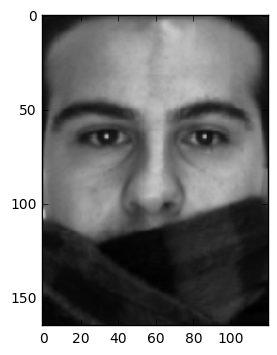

In [5]:
show_face(dataset[10])

### PCA

In [6]:
pca = decomposition.PCA(n_components=120, whiten=True)
pca.fit(dataset)

PCA(copy=True, n_components=120, whiten=True)

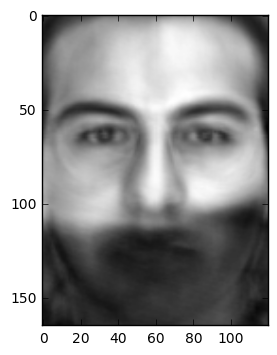

In [7]:
transformed = pca.transform(np.array([dataset[10]]))
show_face(pca.inverse_transform(transformed))

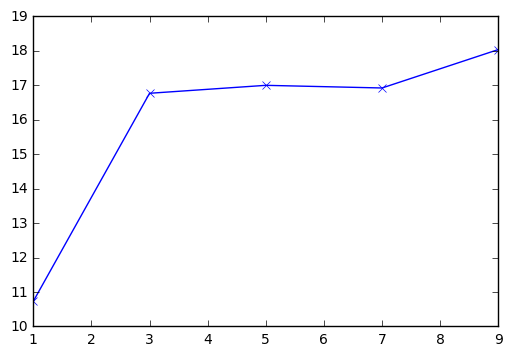

In [19]:
analyze_dims_with_knn(range(1, 10, 2), pca, dataset)

### KPCA

In [34]:
kpca = decomposition.KernelPCA(n_components=15, kernel="rbf", gamma=10, fit_inverse_transform=True)
kpca.fit(dataset)

KernelPCA(alpha=1.0, coef0=1, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=10, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=15,
     remove_zero_eig=False, tol=0)

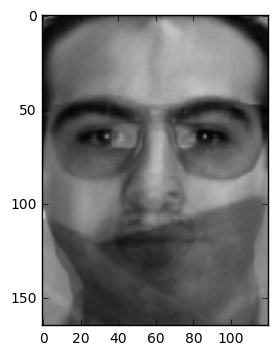

In [35]:
transformed = kpca.transform(np.array([dataset[10]]))
show_face(kpca.inverse_transform(transformed))

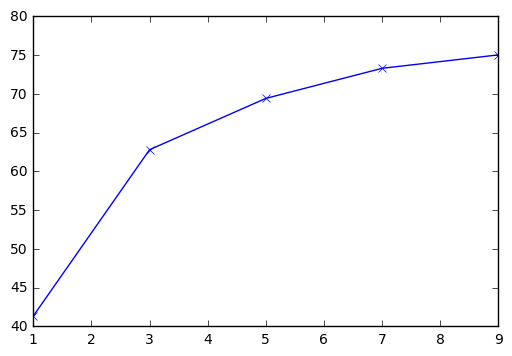

In [51]:
analyze_dims_with_knn(range(1, 10, 2), decomposition.KernelPCA(n_components=150, kernel="linear"), dataset)

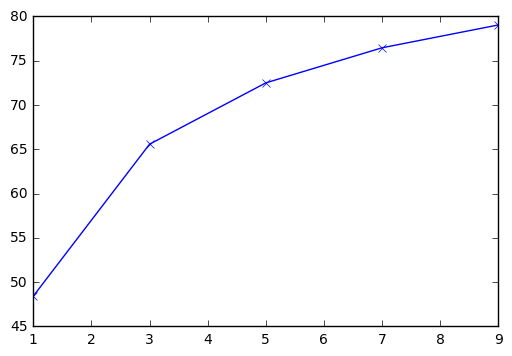

In [52]:
analyze_dims_with_knn(range(1, 10, 2), decomposition.KernelPCA(n_components=150, kernel="poly"), dataset)

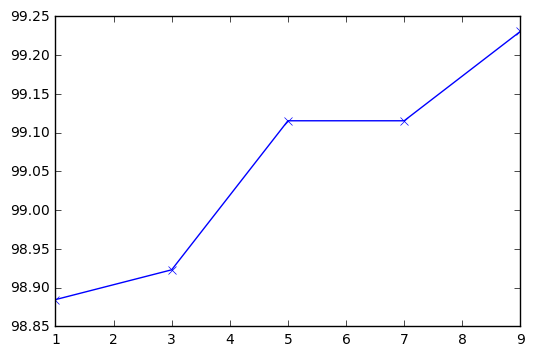

In [42]:
analyze_dims_with_knn(range(1, 10, 2), decomposition.KernelPCA(n_components=150, kernel="rbf", gamma=10), dataset)

### Isomap

Phase #1...
Phase #2...
Phase #3...
Phase #4...
Phase #5...


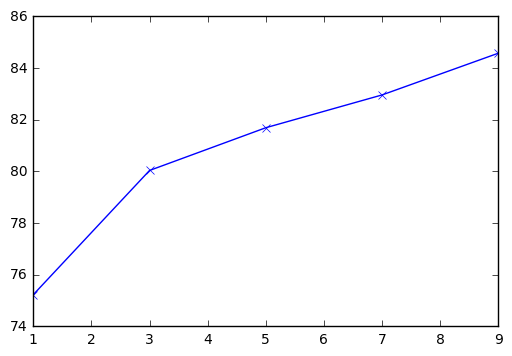

In [5]:
analyze_dims_with_knn(range(1, 10, 2), manifold.Isomap(10, n_components=120), dataset)

Phase #1...
Phase #2...
Phase #3...
Phase #4...
Phase #5...


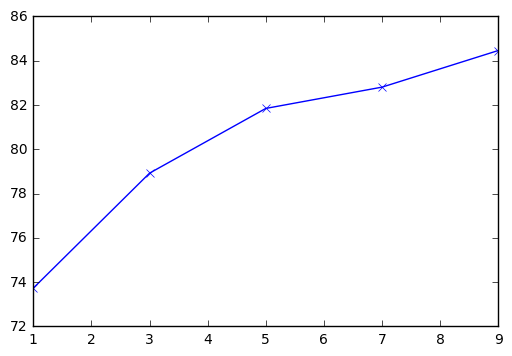

In [5]:
analyze_dims_with_knn(range(1, 10, 2), manifold.Isomap(20, n_components=150), dataset)

### LLE

Phase #1...
Phase #2...
Phase #3...
Phase #4...
Phase #5...


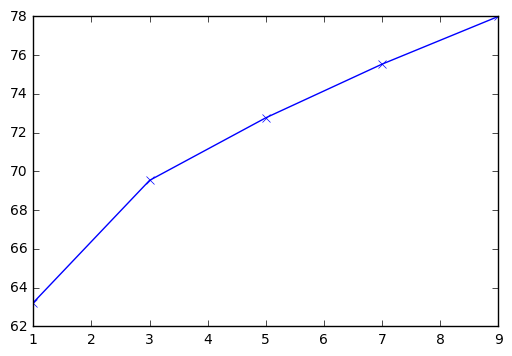

In [6]:
analyze_dims_with_knn(range(1, 10, 2), manifold.LocallyLinearEmbedding(10, n_components=120), dataset)